# MLE 모수 추정

### Maximum Likelihood Estimation

# Likelihood


확률변수 X의 확률모형의 경우,
- PDF $f_X(x;\theta)$에 의해 정의된다.
- x = 실수값 , theta = PDF의 모수 집합
- 일반적으로 theta는 상수 계수(고정된 값), x는  변수(variable)로 가정


**x를 변수로 가지는 PDF란**
>고정된 변수 모형에서,  
>주어진 실수 입력값에 대해  
>그 실수값이 나올 상대적 가능성을 출력

### 하지만

추정 문제의 경우, 
- x(실현된 샘플값)는 알고 있지만, 모수 theta를 모르고 있는 상태.
- x는 상수 계수 (고정값), theta가 찾아야 하는 변수
- PDF는 x가 나올 수 있는 확률밀도 값 = **Likelihood**

>x가 이미 발생. 값을 알고 있는 상태  
>x는 상수, theta는 변수  
>x가 이미 정해져 있는 상황에서의 theta값의 상대적 가능성  

$$\mathcal{L}(\theta;x) = f_X(x ; \theta)  = f_X(x \vert \theta)$$

모수를 확률변수로 볼 때, 조건부 확률밀도함수로도 쓸 수 있다.







# MLE
주어진 샘플 x에 대해 likelihood를 가장 크게 해주는 모수를 찾는 방법

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


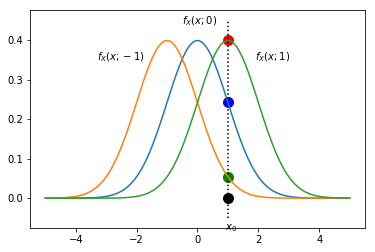

In [4]:
# 예시

x = np.linspace(-5, 5, 100)
plt.plot(x, sp.stats.norm(loc=0).pdf(x))
plt.hold(True)
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.05, 0.45, linestyle=":")
plt.text(1-0.09, -0.08, "$x_0$")
plt.plot(x, sp.stats.norm(loc=-1).pdf(x))
plt.plot(x, sp.stats.norm(loc=1).pdf(x))
plt.scatter(1, sp.stats.norm(loc=-1).pdf(1), s=100, c='g');
plt.scatter(1, sp.stats.norm(loc=0).pdf(1), s=100, c='b');
plt.scatter(1, sp.stats.norm(loc=1).pdf(1), s=100, c='r');
plt.text(-3.3, 0.35, "$f_X(x;-1)$")
plt.text(-0.5, 0.44, "$f_X(x;0)$")
plt.text(1.9, 0.35, "$f_X(x;1)$");

# MLE의 구현

likelihood가 최대가 되는 theta를 수치적으로 계산
- 수치 최적화 (numerical optimization)


$$\hat\theta_{\text{MLE}} = \arg \max_{\theta} L(\theta; \{x_i\})$$

일반적으로는 로그 변환한 로그 Likelihood함수 $\mathcal{LL} = \log{\mathcal{L}}$ 사용한다.

왜?
- 로그변환 해도 최대값의 위치는 변하지 않는다
- 로그변환을 하면 곱셈이 덧셈이 되어 계산이 단순해짐

# MLE : 베르누이 분포 모수 추정

- 베르누이 분포의 PDF

$$P(x ; \theta ) = \text{Bern}(x ; \theta ) = \theta^x (1 - \theta)^{1-x}$$


- N번의 반복 시행은 모두 독립이므로, 전체 PDF = 각각의 PDF의 곱
- 이후 Likelihood
$$L(\theta ; x_{1:N}) = P(x_{1:N};\theta) = \prod_{i=1}^N  \theta^{x_i} (1 - \theta)^{1-x_i}$$

- Log Likelihood
$$\begin{eqnarray*}
\log L 
&=& \log P(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \big\{ {x_i} \log\theta + (1-x_i)\log(1 - \theta) \big\} \\
&=&  \sum_{i=1}^N {x_i} \log\theta +  \left( N-\sum_{i=1}^N x_i \right) \log( 1 - \theta ) \\
\end{eqnarray*}$$  

  

성공은 x = 1, 실패는 x = 0 이므로 $N_1 = \sum_{i=1}^N {x_i}$

따라서
$$
\begin{eqnarray*}
\log L 
&=&  N_1 \log\theta  + (N-N_1) \log(1 - \theta) \\
\end{eqnarray*}$$


이 값을 미분

$$\begin{eqnarray*}
\dfrac{\partial \log L}{\partial \theta} 
&=& \dfrac{\partial}{\partial \theta} \big\{ N_1 \log\theta  + (N-N_1) \log(1 - \theta)  \big\} = 0\\
&=& \dfrac{N_1}{\theta}  - \dfrac{N-N_1}{1-\theta} = 0 \\
\end{eqnarray*}$$

$$\dfrac{N_1}{\theta}  = \dfrac{N-N_1}{1-\theta}$$

$$\dfrac{1-\theta}{\theta} = \dfrac{N-N_1}{N_1}$$

$$\dfrac{1}{\theta} - 1 = \dfrac{N}{N_1} - 1$$

$$\theta= \dfrac{N_1}{N}$$

In [6]:
np.random.seed(0)
theta0 = 0.6
x = sp.stats.bernoulli(theta0).rvs(1000)
N0, N1 = np.bincount(x, minlength=2)
N = N0 + N1
theta = N1/N
theta

0.60999999999999999

# MLE : 카테고리 분포


$$P(x ; \theta ) = \text{Cat}(x ; \theta) = \prod_{k=1}^K \theta_k^{x_k}$$

$$\sum_{k=1}^K \theta_k = 1$$

- 모두 독립일 때, 전체 PDF는 각각 PDF의 곱

$$L(\theta ; x_{1:N}) = P(x_{1:N};\theta) = \prod_{i=1}^N \prod_{k=1}^K \theta_k^{x_{i,k}}$$

- Log-Likelihood를 위한 로그변환

$$\begin{eqnarray*}
\log L 
&=& \log P(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \sum_{k=1}^K  \left( {x_{i,k}} \log\theta_k  \right) \\
&=& \sum_{k=1}^K  \sum_{i=1}^N  \left(  \log\theta_k  {x_{i,k}}\right) \\
&=& \sum_{k=1}^K \left( \log\theta_k \left( \sum_{i=1}^N {x_{i,k}}   \right)  \right)
\end{eqnarray*}$$

x_k가 나온 횟수를 N_K로 다음과 같이 표기해줄 때, $N_k = \sum_{i=1}^N {x_{i,k}}$

Log-Likelihood는 다음과 같아지며, 이 함수를 최대화 하는 theta의 값을 찾아야 함.  

(모수에 대한 조건 : $\sum_{k=1}^K \theta_k = 1$)


$$\log L = \sum_{k=1}^K \left( \log\theta_k  N_k  \right)$$

라그랑주 승수법을 사용, LL을 다음과 같이 변형 후, 모수로 미분한 값이 0이 되는 값을 구함

$$\begin{eqnarray*}
\dfrac{\partial \log L}{\partial \theta_k} 
&=& \dfrac{\partial}{\partial \theta_k} \left\{ \sum_{k=1}^K \log\theta_k N_k  + \lambda \left(1- \sum_{k=1}^K \theta_k\right)  \right\} = 0 \\
\dfrac{\partial \log L}{\partial \lambda} 
&=& \dfrac{\partial}{\partial \lambda} \left\{ \sum_{k=1}^K \log\theta_k N_k  + \lambda \left(1- \sum_{k=1}^K \theta_k \right)  \right\} = 0\\
\end{eqnarray*}$$

위를 풀면, 

$$\dfrac{N_1}{\theta_1}  = \dfrac{N_2}{\theta_2} = \cdots = \dfrac{N_K}{\theta_K} = \lambda$$

$$\sum_{k=1}^K N_k = N$$

$$\lambda \sum_{k=1}^K \theta_k  = \lambda = N$$

$$\theta_k = \dfrac{N_k}{N}$$

In [7]:
np.random.seed(0)
theta0 = np.array([0.1, 0.3, 0.6])
x = np.random.choice(np.arange(3), 1000, p=theta0)
N0, N1, N2 = np.bincount(x, minlength=3)
N = N0 + N1 + N2
theta = np.array([N0, N1, N2]) / N
theta

array([ 0.098,  0.317,  0.585])

# MLE : 가우시안 정규분포

가우시안 정규분포의 PDF

$$ p(x ; \theta ) = N(x ; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$

모두 독립일 때는, 전체 PDF = 각각 PDF의 곱

$$ L(\theta;x_{1:N}) = p(x_{1:N};\theta) = \prod_{i=1}^N  \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_i-\mu)^2}{2\sigma^2}\right)$$

Log-Likelihood, 상수 부분은 C로 표기한다.

$$ 
\begin{eqnarray*}
\log L 
&=& \log p(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \left\{ -\dfrac{1}{2}\log(2\pi\sigma^2) - \dfrac{(x_i-\mu)^2}{2\sigma^2} \right\} \\
&=& -\dfrac{N}{2} \log(2\pi\sigma^2) - \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2
\end{eqnarray*}
$$

PDF가 최대가 되는 모수 값을 찾기 위해서, 각각 모수로 미분한 값이 0

$$
\begin{eqnarray*}
\dfrac{\partial \log L}{\partial \mu} 
&=& \dfrac{\partial}{\partial \mu} \left\{ \dfrac{N}{2} \log(2\pi\sigma^2) + \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2  \right\} = 0 \\
\dfrac{\partial \log L}{\partial \sigma^2} 
&=& \dfrac{\partial}{\partial \sigma^2} \left\{ \dfrac{N}{2} \log(2\pi\sigma^2) + \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2 \right\} = 0\\
\end{eqnarray*}
$$

위의 두 식을 풀어, likelihood를 최대로 하는 모수 값을 구할 수 있음

$$
\dfrac{2}{2\sigma^2}\sum_{i=1}^N (x_i-\mu) = 0
$$

$$
N \mu = \sum_{i=1}^N x_i
$$

$$
\mu = \dfrac{1}{N}\sum_{i=1}^N x_i = \bar{x}
$$

$$
\dfrac{N}{2\sigma^2 } -  \dfrac{1}{2(\sigma^2)^2}\sum_{i=1}^N (x_i-\mu)^2  = 0
$$


$$
\sigma^2  =  \dfrac{1}{N}\sum_{i=1}^N (x_i-\mu)^2 = \dfrac{1}{N}\sum_{i=1}^N (x_i-\bar{x})^2 = s^2
$$

In [8]:
np.random.seed(0)
mu0 = 1
sigma0 = 2
x = sp.stats.norm(mu0, sigma0).rvs(1000)
xbar = x.mean()
s2 = x.std(ddof=1)
xbar, s2

(0.90948658501960922, 1.9750540913890255)

# MLE : 다변수 정규 분포

다변수 정규분포의 PDF 

$$ p(x ; \theta ) = N(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) $$

반복 시행은 모두 독립이므로 전체 PDF = 각각 PDF의 곱

$$ L(\theta;x_{1:N}) = p(x_{1:N};\theta) = \prod_{i=1}^N  \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x_i-\mu)^T \Sigma^{-1} (x_i-\mu) \right)$$

미분을 위한 Log-Likelihood, 상수 부분은 C로 표기

$$ 
\begin{eqnarray*}
\log L 
&=& \log P(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \left\{ -\log((2\pi)^{D/2} |\Sigma|^{1/2}) - \dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right\} \\
&=& C -\dfrac{N}{2} \log|\Sigma| - \dfrac{1}{2} \sum_i^N (x_i-\mu)^T \Sigma^{-1} (x_i-\mu) 
\end{eqnarray*}
$$

precision matrix $\Sigma ^{-1} $를 Lambda $ \Lambda$ 로 단순하게 표기.

$$ 
\begin{eqnarray*}
\log L 
&=& C + \dfrac{N}{2} \log|\Lambda| - \dfrac{1}{2} \sum_i^N(x_i-\mu)^T \Lambda (x_i-\mu) 
\end{eqnarray*}
$$

각각 모수로 미분한 값이 0이 되어야 함수가 최대값이 되는 모수를 구할 수 있다.

$$ \dfrac{\partial L}{\partial \mu} = -  \dfrac{\partial}{\partial \mu}  \sum_{i=1}^N (x_i-\mu)^T \Lambda (x_i-\mu) =  - \sum_{i=1}^N 2\Lambda (x_i - \mu) = -2\Lambda \sum_{i=1}^N  (x_i - \mu) = 0 $$

$$ \dfrac{\partial L}{\partial \Lambda} = \dfrac{\partial}{\partial \Lambda} \dfrac{N}{2} \log|\Lambda| - \dfrac{\partial}{\partial \Lambda}  \dfrac{1}{2} \sum_{i=1}^N \text{tr}( (x_i-\mu)(x_i-\mu)^T\Lambda) =0  $$

likelihood를 가장 크게 하는 모수의 값

$$ \sum_{i=1}^N  (x_i - \mu) = 0 $$

$$ \mu = \dfrac{1}{N}\sum_{i=1}^N x_i $$

$$ \dfrac{N}{2} \Lambda^{-T} = \dfrac{1}{2}\sum_{i=1}^N (x_i-\mu)(x_i-\mu)^T $$ 

$$ \Sigma = \dfrac{1}{N}\sum_{i=1}^N (x_i-\mu)(x_i-\mu)^T $$ 

In [9]:
np.random.seed(0)
mu0 = np.array([0, 1])
sigma0 = np.array([[1, 0.2], [0.2, 4]])
x = sp.stats.multivariate_normal(mu0, sigma0).rvs(1000)
xbar = x.mean(axis=0)
S2 = np.cov(x, rowvar=0)
print(xbar)
print(S2)

[-0.0126996   0.95720206]
[[ 0.96100921  0.16283508]
 [ 0.16283508  3.80507694]]


In [2]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm